# Classificação do Conjunto de Dados de Câncer de Mama de Wisconsin (Diagnóstico) 

# Importação das bibliotecas e módulos do Python

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC

sns.set_style()
%matplotlib inline

# Importação do Conjunto de Dados

In [52]:
data_path = "https://www.dropbox.com/s/z8nw6pfumdw3bb9/breast-cancer-wisconsin.csv?raw=1" 
df = pd.read_csv(data_path)

# Análise dos dados

In [4]:
# Dimensão do dataset (linhas; colunas):

print("O conjunto de dados possui como linhas;colunas:", df.shape)

O conjunto de dados possui como linhas;colunas: (569, 33)


In [5]:
# Impressão de apenas as duas primeiras linhas

print(df.head(2)) 

       id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   
1  ...          23.41            158.8      1956.0            0.1238   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN

In [6]:
# Observação das colunas(atributos) presentes no conjunto de dados e análise da quantidade de instâncias,a presença de valores nulos e os tipos dos dados em cada atributo:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [53]:
# Diante da coluna "Unnamed: 32", em que todas as linhas não possuem valores e da coluna "id", a qual não é considerada relevante no processo de classificação, ambas serão retiradas.

df.drop('Unnamed: 32', axis=1, inplace=True)
df.drop("id", axis = 1, inplace = True)

In [54]:
# Aplicação da normalização por reescala nas colunas do DataFrame que contêm valores continuos.
# Por padrão, o método minmax_scale reescala com min=0 e max=1.
cols= list(df.columns.difference(['diagnosis']))

df_amp = df.copy()
df_amp[cols] = df[cols].apply(minmax_scale)

# Aplicação da normalização por padronização a todas as colunas do Conjunto de dados.
# Por padrão, o método scale subtrai a média e divide pelo desvio-padrão.

df_dist = df.copy()
df_dist[cols] = df[cols].apply(scale)

# Análise dos dados: distribuição das instâncias em relação às classes

Diagnósticos:
B    0.627417
M    0.372583
Name: diagnosis, dtype: float64


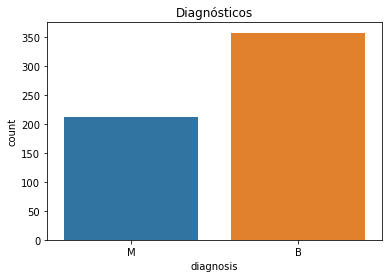

<Figure size 432x288 with 0 Axes>

In [15]:
print("Diagnósticos:")
print(df.diagnosis.value_counts() / df.shape[0])

fig, ax = plt.subplots()
sns.countplot('diagnosis', data=df, ax=ax)
ax.set_title("Diagnósticos")
plt.show()
plt.savefig("distr_cancer.png")

Divisão dos atributos em 3 categorias - média (mean), erro padrão (se) e pior caso (worst):

In [55]:
atributos_mean = list(df.columns[1:11]) 
atributos_se = list(df.columns[11:21])
atributos_worst = list(df.columns[21:31])

print("Lista de atributos mean: ","\n", atributos_mean, "\n", "Lista de atributos se: ","\n",atributos_se, "\n", "Lista de atributos worst: ","\n",atributos_worst)

Lista de atributos mean:  
 ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'] 
 Lista de atributos se:  
 ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se'] 
 Lista de atributos worst:  
 ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


# Análise dos dados: distribuição das instâncias em relação aos atributos
Baseada em atributos_mean

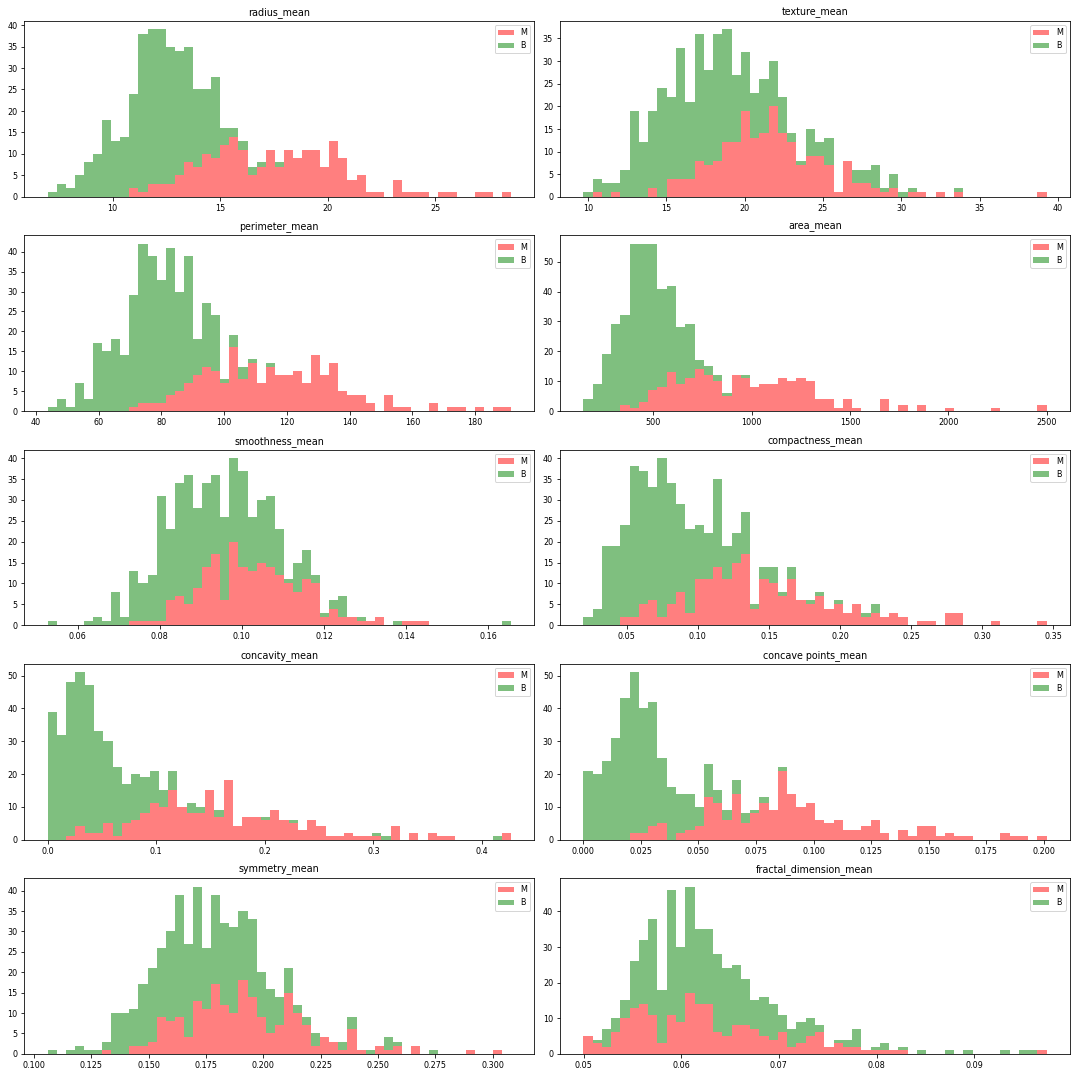

In [17]:
# Divisão do conjunto de dados de acordo com a classe (o diagnóstico)
dM=df[df['diagnosis'] == 'M']
dB=df[df['diagnosis'] =='B']

plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,15))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[atributos_mean[idx]]) - min(df[atributos_mean[idx]]))/50
    ax.hist([dM[atributos_mean[idx]],dB[atributos_mean[idx]]], bins=np.arange(min(df[atributos_mean[idx]]), max(df[atributos_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True,label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(atributos_mean[idx])
plt.tight_layout()
plt.show()

Baseada em atributos_se

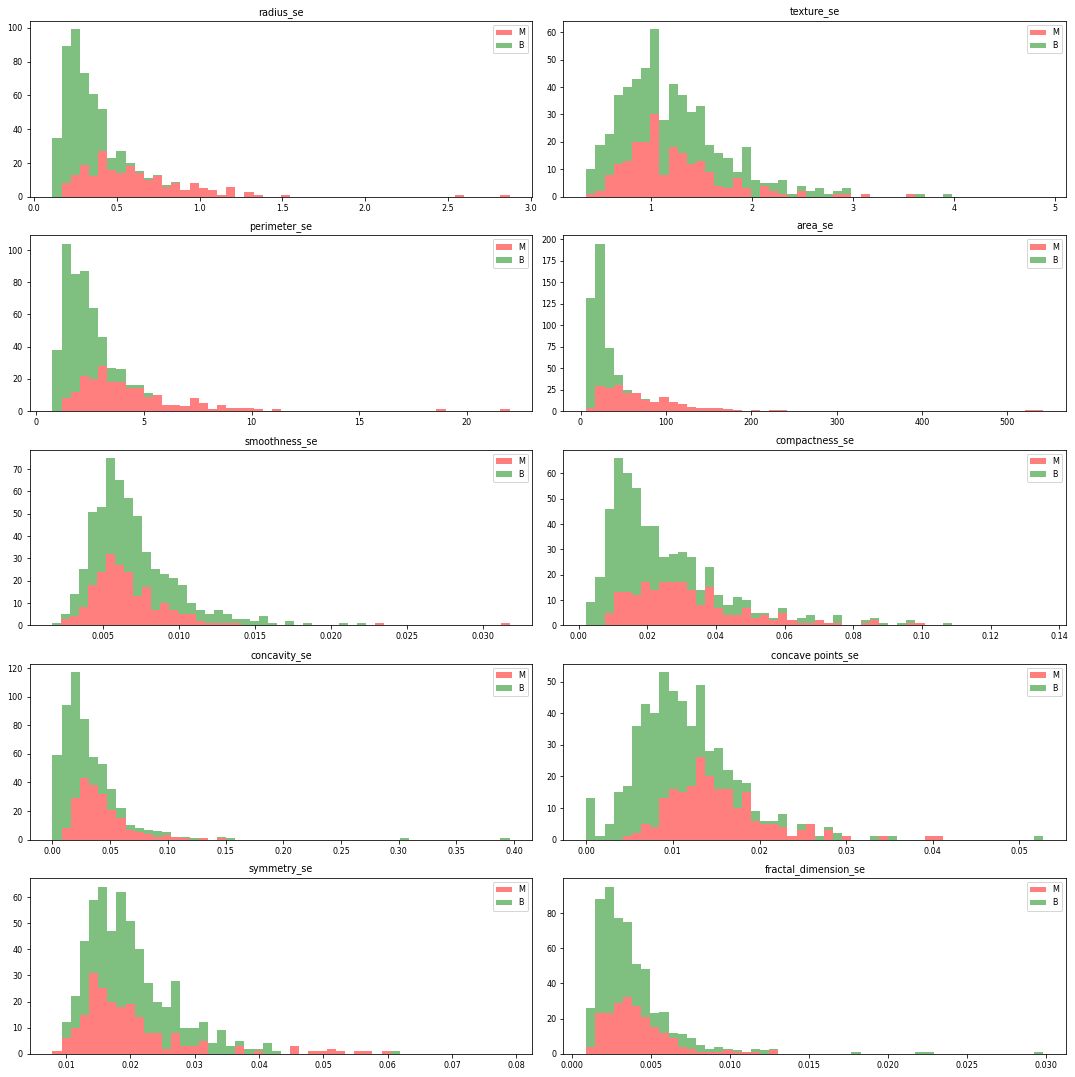

In [21]:
# Divisão do conjunto de dados de acordo com a classe (o diagnóstico)
dM=df[df['diagnosis'] == 'M']
dB=df[df['diagnosis'] =='B']

plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,15))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[atributos_se[idx]]) - min(df[atributos_se[idx]]))/50
    ax.hist([dM[atributos_se[idx]],dB[atributos_se[idx]]], bins=np.arange(min(df[atributos_se[idx]]), max(df[atributos_se[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True,label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(atributos_se[idx])
plt.tight_layout()
plt.show()


Baseada em atributos_worst

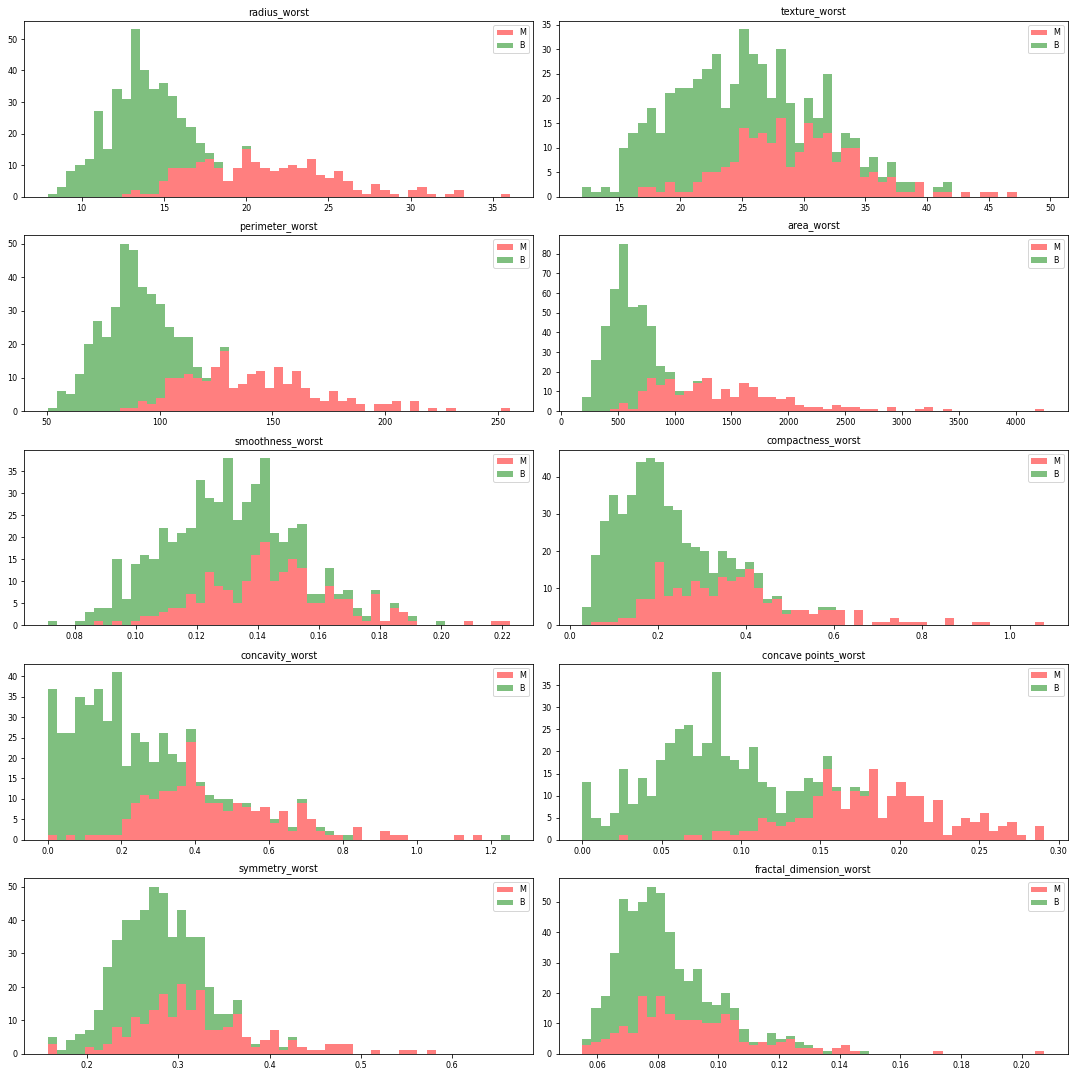

In [24]:
# Divisão do conjunto de dados de acordo com a classes (o diagnóstico)
dM=df[df['diagnosis'] == 'M']
dB=df[df['diagnosis'] =='B']


plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,15))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[atributos_worst[idx]]) - min(df[atributos_worst[idx]]))/50
    ax.hist([dM[atributos_worst[idx]],dB[atributos_worst[idx]]], bins=np.arange(min(df[atributos_worst[idx]]), max(df[atributos_worst[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True,label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(atributos_worst[idx])
plt.tight_layout()
plt.show()

# Análise dos dados: correlação dos atributos
Considerando todos os atributos:

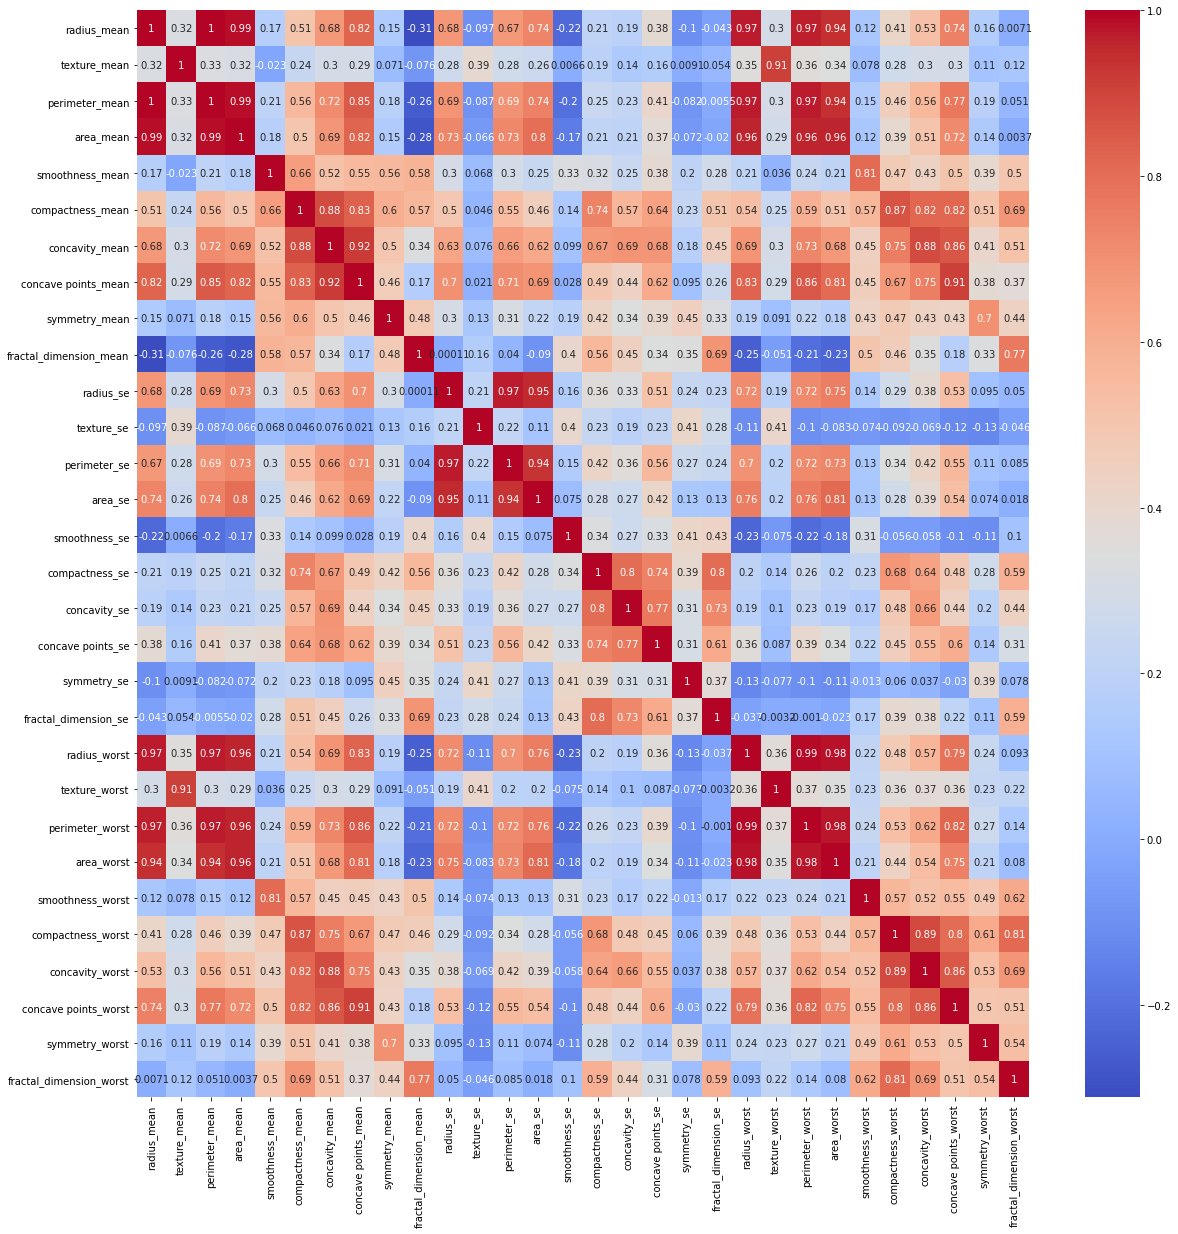

In [67]:
fig, ax = plt.subplots(figsize=(20,20))
plot= sns.heatmap(df.corr(), cmap='coolwarm', ax=ax, annot=True)
plt.show()

Correlação entre atributos_mean:

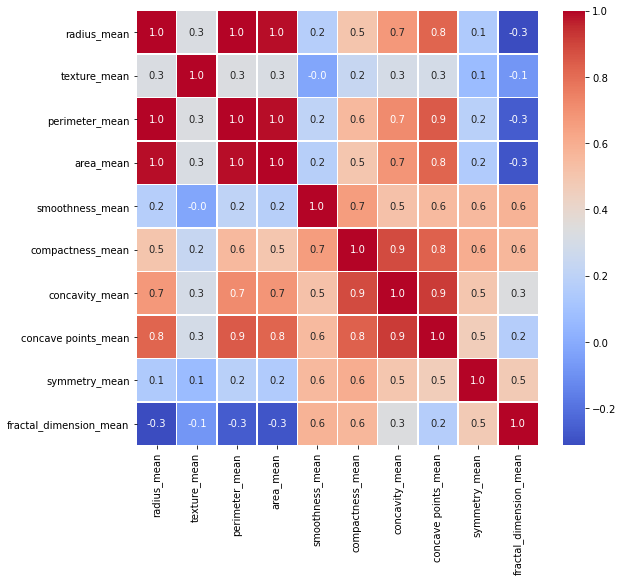

In [68]:
df_mean=df[atributos_mean]
df_mean.head()

f,ax = plt.subplots(figsize=(9, 8))
sns.heatmap(df_mean.corr(), cmap='coolwarm', annot=True, linewidths=.5, fmt= '.1f',ax=ax);

Correlação entre atributos_se:

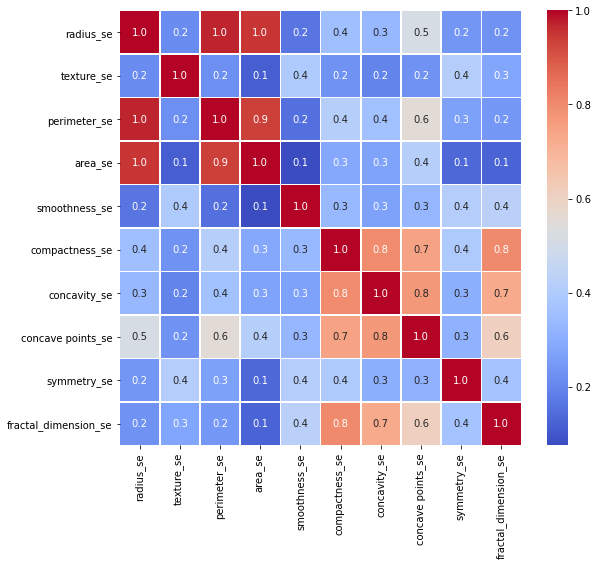

In [69]:
df_mean=df[atributos_se]
df_mean.head()

f,ax = plt.subplots(figsize=(9, 8))
sns.heatmap(df_mean.corr(), cmap='coolwarm', annot=True, linewidths=.5, fmt= '.1f',ax=ax);

Correlação entre atributos_worst:

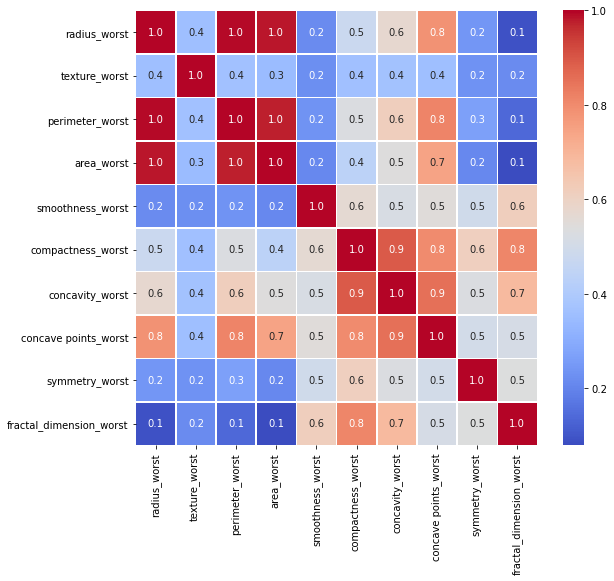

In [70]:
df_mean=df[atributos_worst]
df_mean.head()

f,ax = plt.subplots(figsize=(9, 8))
sns.heatmap(df_mean.corr(), cmap='coolwarm', annot=True, linewidths=.5, fmt= '.1f',ax=ax);

# Divisão do conjunto de dados em treinamento (80%) e teste (20%)

In [55]:
#Sepração do conjunto de dados em variáveis dependentes (X) e variável independente (y):


X = df[df.columns.difference(['diagnosis'])].values
y = df['diagnosis'].values
class_names = df['diagnosis'].unique()


#Realizando a separação do Conjunto de dados:
#Para o processo pseudo-aleatório de divisão dos grupos, a semente foi fixada em 0.

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



Verificação da divisão do conjunto de dados:

In [56]:
print("(Quantidade de exemplos, quantidade de atributos) dos conjuntos de treinamento e teste: ")
X_train.shape, X_test.shape

(Quantidade de exemplos, quantidade de atributos) dos conjuntos de treinamento e teste: 


((455, 30), (114, 30))

In [57]:
print("(Quantidade de rótulos) dos conjuntos de treinamento e teste: ")
Y_train.shape, Y_test.shape

(Quantidade de rótulos) dos conjuntos de treinamento e teste: 


((455,), (114,))

# Criando modelos 
Árvore de decisão - CART:

In [58]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Predição pelo algoritmo indutor utilizando o conjunto de treinamento (80% dos dados) para observar a acurácia obtida no treinamento:

In [59]:
predicao_arvore= arvore.predict(X_train)

Acurácia da árvore de decisão gerada (conjunto de treinamento= 80%)

In [60]:
acuracia_treino = accuracy_score(predicao_arvore,Y_train)
print('\nAcurácia obtida no treinamento da Árvore de decisão (80% dados de treinamento): ', acuracia_treino)


Acurácia obtida no treinamento da Árvore de decisão (80% dados de treinamento):  1.0


Matriz de confusão da árvore gerada (descrição dos valores de precisão e erro aparente)

[[290   0]
 [  0 165]]


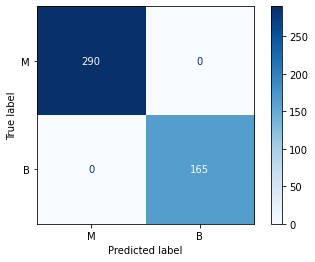

In [61]:
disp = plot_confusion_matrix (arvore, X_train, Y_train, display_labels=class_names,cmap=plt.cm.Blues)
print(disp.confusion_matrix)
plt.show()

# Em busca da correção da generalização da Árvore de decisão: Poda

In [62]:
print("(Quantidade de rótulos) dos conjuntos de treinamento e teste: ")
Y_train.shape, Y_test.shape

(Quantidade de rótulos) dos conjuntos de treinamento e teste: 


((455,), (114,))

Acurácia= [0.9230769230769231, 0.9318681318681319, 0.9648351648351648, 0.9868131868131869, 0.9912087912087912]


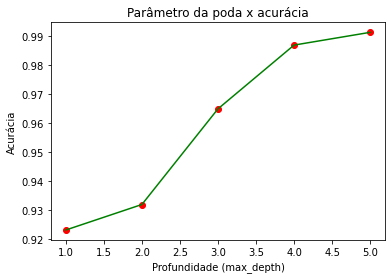

In [64]:
# Visando encontrar um valor ótimo de profundidade da árvore:
max_prof_range = list(range(1, 6))
# Criação de um lista para armazenar os valores de acurácia obtidos com os diferentes limites de profundidade:
acuracia = []
for prof in max_prof_range:
    
    arv2 = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth = prof)
    arv2.fit(X_train, Y_train)
    predicao_arv2 = arv2.predict (X_train)
    acc = accuracy_score (predicao_arv2,Y_train)
    acuracia.append(acc)

print ("Acurácia=", acuracia)
    
#Construção do gráfico 2D para avaliar a acurácia em relação ao parâmetro profundidade:

x= max_prof_range
y= acuracia

plt.plot(x, y, color='green')
plt.scatter(x, y, color='red')
plt.title('Parâmetro da poda x acurácia')
plt.xlabel('Profundidade (max_depth)')
plt.ylabel('Acurácia')

plt.show()

# Predição do conjunto de teste pela Árvore de decisão podada
Profundidade (max_depth) = 3.0

In [65]:
print("(Quantidade de rótulos) dos conjuntos de treinamento e teste: ")
Y_train.shape, Y_test.shape

(Quantidade de rótulos) dos conjuntos de treinamento e teste: 


((455,), (114,))

In [66]:
arv2 = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth = 3)
arv2.fit(X_train, Y_train)
predicao_arv2 = arv2.predict (X_test)

Acurácia da árvore de decisão gerada (conjunto de teste= 20%)

In [67]:
acuracia_depth2 = accuracy_score(predicao_arv2,Y_test)
print('\nAcurácia obtida na predição feita pela Árvore de decisão (max_depth=3): ', acuracia_depth2)


Acurácia obtida na predição feita pela Árvore de decisão (max_depth=3):  0.9473684210526315


[[62  5]
 [ 1 46]]


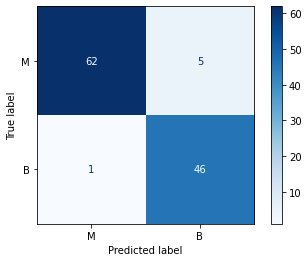

In [69]:

disp3 = plot_confusion_matrix (arv2, X_test, Y_test, display_labels=class_names,cmap=plt.cm.Blues)

print(disp3.confusion_matrix)
plt.show()

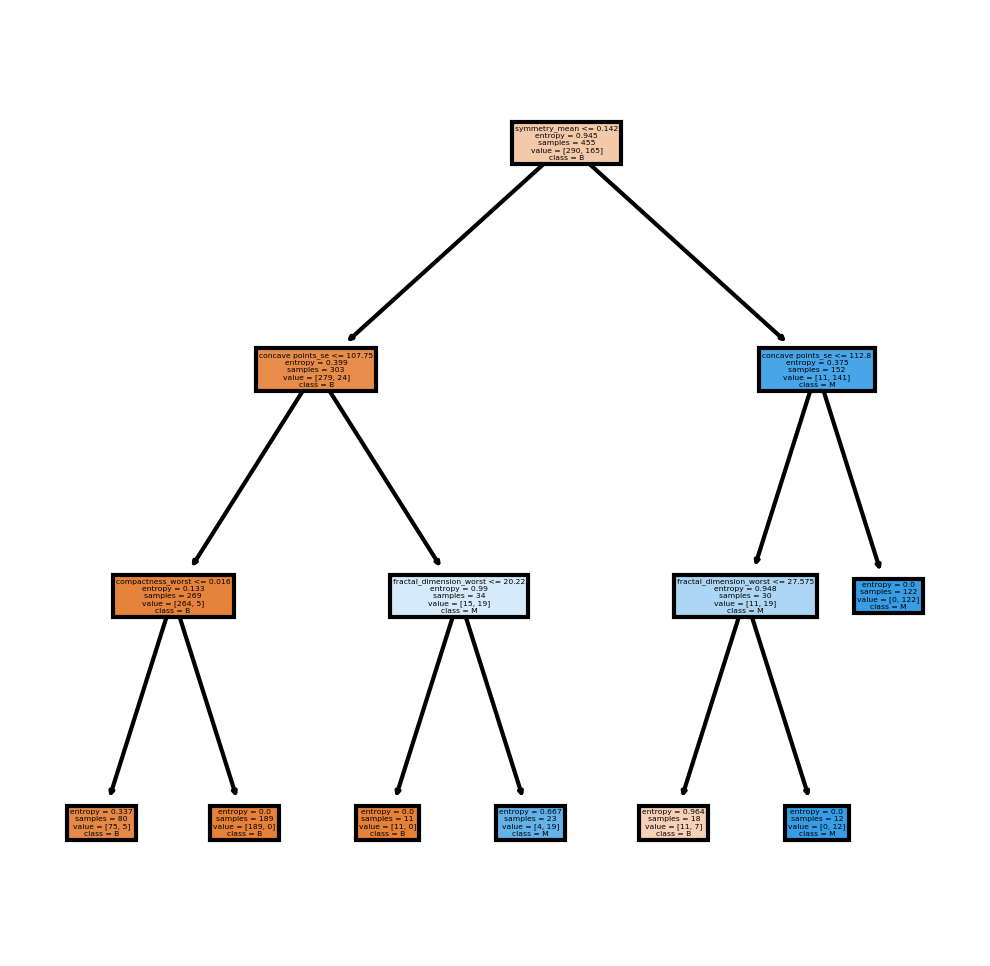

In [70]:
fn=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
cn=['B', 'M']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(arv2,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('arv2_d3.png')

# Predição do conjunto de teste pela Árvore podada
Profundidade (max_depth:4)

In [20]:
arv2_d4 = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth = 4)
arv2_d4.fit(X_train, Y_train)
predicao_arv2_d4 = arv2_d4.predict (X_test)

Acurácia da árvore de decisão gerada (conjunto de teste= 20%)

In [21]:
acuracia_depth4 = accuracy_score(predicao_arv2_d4,Y_test)
print('\nAcurácia obtida na predição feita pela Árvore de decisão (max_depth=4): ', acuracia_depth4)


Acurácia obtida na predição feita pela Árvore de decisão (max_depth=4):  0.9385964912280702


Matriz de confusão da árvore gerada (descrição dos valores de precisão e erro verdadeiro)

[[62  5]
 [ 2 45]]


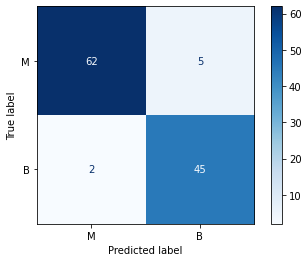

In [22]:
disp2 = plot_confusion_matrix (arv2_d4, X_test, Y_test, display_labels=class_names,cmap=plt.cm.Blues)

print(disp2.confusion_matrix)
plt.show()

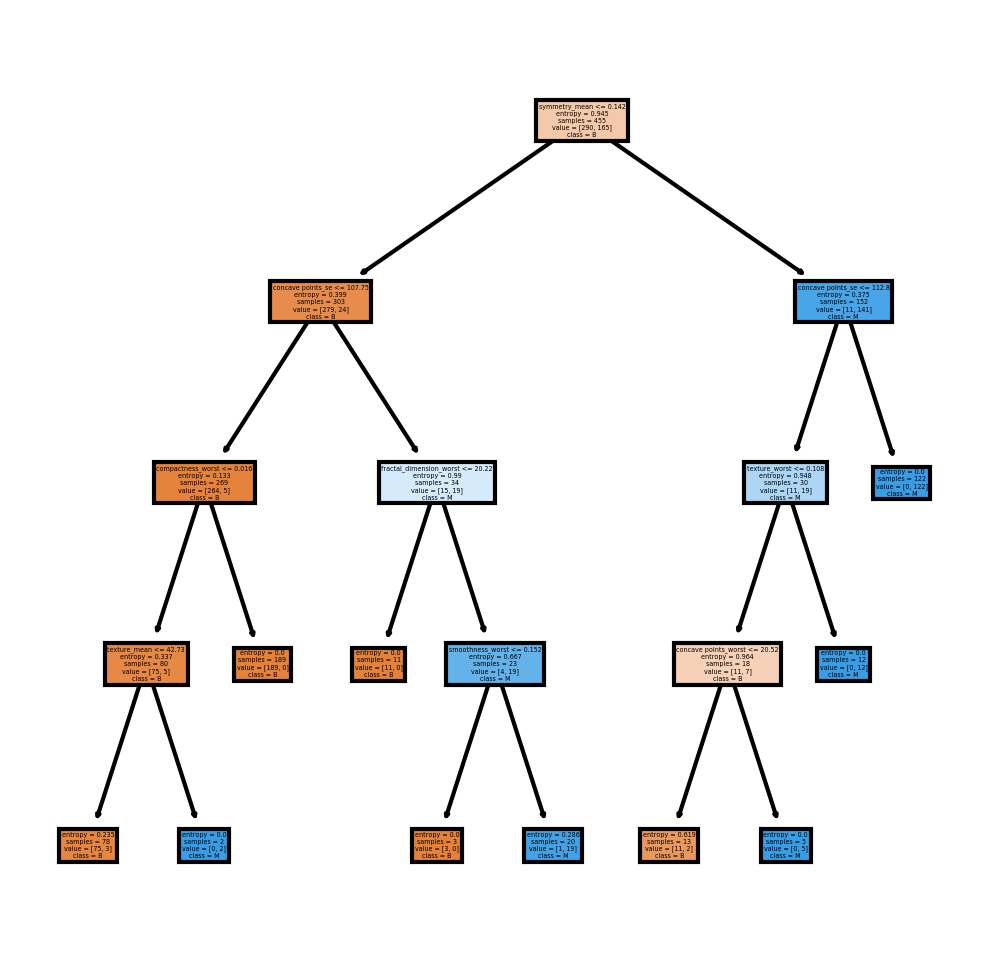

In [23]:
fn=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
cn=['B', 'M']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(arv2_d4,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('arv2_d4.png')

# Redução da dimensionalidade dos dados
Considerando o método de Seleção de Atributos baseada na Correlação (CFS):

In [71]:
#Criação de uma matriz de correlação entre todos os atributos:
#Criação de um conjunto vazio para armazenar os atributos correlacionados:

atributos_correlacionados = set()
matriz_correlacao = df.corr()

#Selecionaremos os atributos com uma correlação superior a 0.5:

for i in range(len(matriz_correlacao.columns)):
    for j in range (i):
        if abs(matriz_correlacao.iloc[i,j])>0.8:
            nomecol = matriz_correlacao.columns [i]
            atributos_correlacionados.add(nomecol)
            
#Para conferir quantos e quais atributos foram selecionados:

porc = (len(atributos_correlacionados)/30) * 100
print("Foram selecionados",len(atributos_correlacionados),"atributos, que representam",porc, "dos atributos") 

Foram selecionados 17 atributos, que representam 56.666666666666664 dos atributos


Remoção dos atributos correlacionados do conjunto de treinamento e teste:

In [72]:
atributos2 = df[df.columns.difference(atributos_correlacionados)]
atributos2

,compactness_mean,compactness_se,concave points_se,diagnosis,fractal_dimension_mean,radius_mean,radius_se,smoothness_mean,smoothness_se,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se
0,0.27760,0.04904,0.01587,M,0.07871,17.99,1.0950,0.11840,0.006399,0.2419,0.03003,0.4601,10.38,0.9053
1,0.07864,0.01308,0.01340,M,0.05667,20.57,0.5435,0.08474,0.005225,0.1812,0.01389,0.2750,17.77,0.7339
2,0.15990,0.04006,0.02058,M,0.05999,19.69,0.7456,0.10960,0.006150,0.2069,0.02250,0.3613,21.25,0.7869
3,0.28390,0.07458,0.01867,M,0.09744,11.42,0.4956,0.14250,0.009110,0.2597,0.05963,0.6638,20.38,1.1560
4,0.13280,0.02461,0.01885,M,0.05883,20.29,0.7572,0.10030,0.011490,0.1809,0.01756,0.2364,14.34,0.7813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.11590,0.02891,0.02454,M,0.05623,21.56,1.1760,0.11100,0.010300,0.1726,0.01114,0.2060,22.39,1.2560
565,0.10340,0.02423,0.01678,M,0.05533,20.13,0.7655,0.09780,0.005769,0.1752,0.01898,0.2572,28.25,2.4630
566,0.10230,0.03731,0.01557,M,0.05648,16.60,0.4564,0.08455,0.005903,0.1590,0.01318,0.2218,28.08,1.0750
567,0.27700,0.06158,0.01664,M,0.07016,20.60,0.7260,0.11780,0.006522,0.2397,0.02324,0.4087,29.33,1.5950


# Divisão do novo conjunto de dados em treinamento (80%) e teste (20%)

In [73]:
#Sepração do conjunto de dados em variáveis dependentes (X) e variável independente (y):


X = atributos2[atributos2.columns.difference(['diagnosis'])].values
y = df['diagnosis'].values
class_names = df['diagnosis'].unique()

In [74]:
#Realizando a separação do Conjunto de dados:
#Para o processo pseudo-aleatório de divisão dos grupos, a semente foi fixada em 0.

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 0)

Verificação da divisão do conjunto de dados:

In [75]:
print("(Quantidade de exemplos, quantidade de atributos) dos conjuntos de treinamento e teste: ")
X_train2.shape, X_test2.shape

(Quantidade de exemplos, quantidade de atributos) dos conjuntos de treinamento e teste: 


((455, 13), (114, 13))

# Avaliando a predição feita pela Árvore de decisão com o novo conjunto de dados

In [76]:
arv2.fit(X_train2, Y_train2)

In [83]:
predicao_arv2_treino = arv2.predict (X_train2)

In [84]:
acuracia_depth2_treino = accuracy_score(predicao_arv2_treino,Y_train2)
print('\nAcurácia obtida na predição feita pela Árvore de decisão (max_depth=3): ', acuracia_depth2_treino)


Acurácia obtida na predição feita pela Árvore de decisão (max_depth=3):  0.9296703296703297


In [76]:
predicao_arv2 = arv2.predict (X_test2)

Acurácia da árvore de decisão gerada (conjunto de teste= 20%)

In [77]:
acuracia_depth2 = accuracy_score(predicao_arv2,Y_test2)
print('\nAcurácia obtida na predição feita pela Árvore de decisão (max_depth=3): ', acuracia_depth2)


Acurácia obtida na predição feita pela Árvore de decisão (max_depth=3):  0.9035087719298246


[[60  7]
 [ 4 43]]


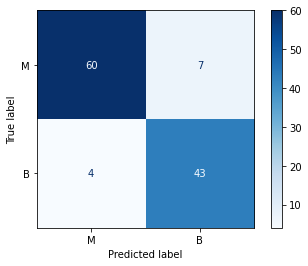

In [80]:
disp3 = plot_confusion_matrix (arv2, X_test2, Y_test2, display_labels=class_names,cmap=plt.cm.Blues)

print(disp3.confusion_matrix)
plt.show()

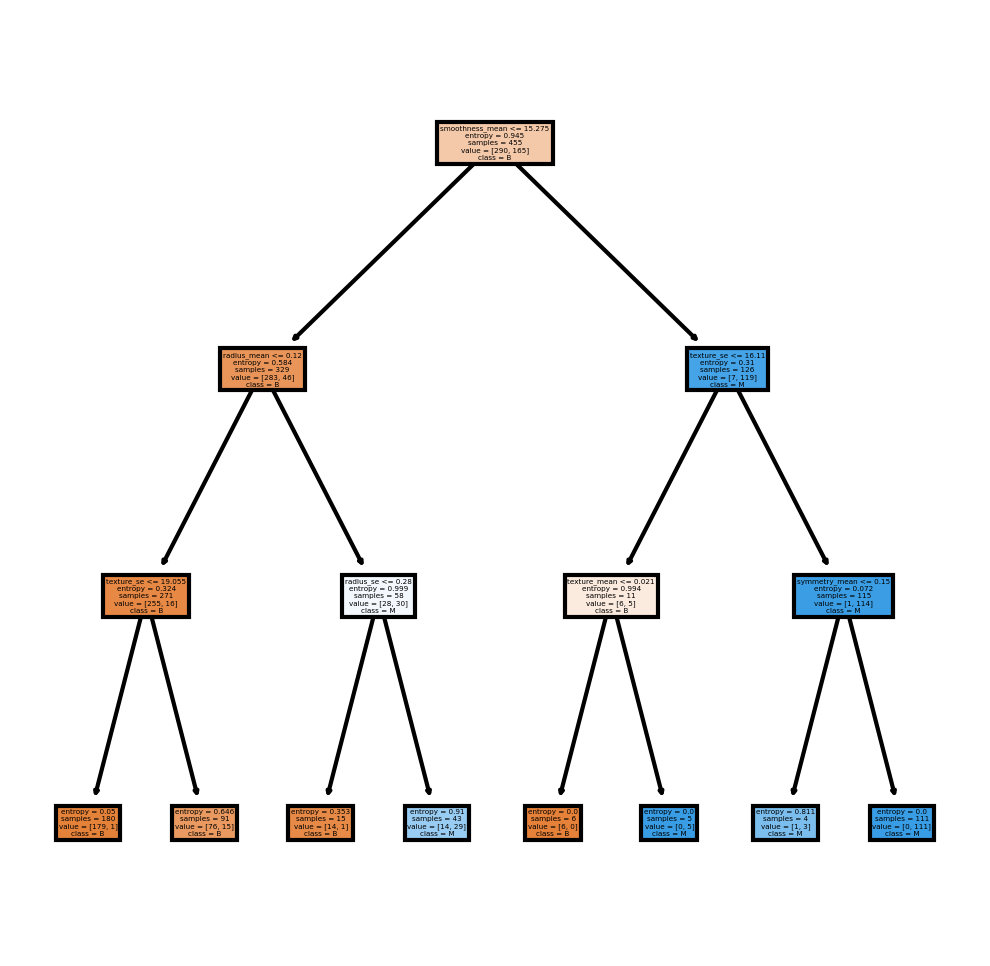

In [81]:
fn=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
cn=['B', 'M']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(arv2,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('arv2_d3_red.png')